In [41]:
# 1. Скачать датасет о качестве КРАСНОГО вина по ссылке. https://archive.ics.uci.edu/ml/datasets/wine+quality
import pandas as pd
import matplotlib.pyplot as plt #работает с графиками и диаграммами
import seaborn as sns #работает с графиками и диаграммами

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
df.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6

[5 rows x 12 columns]

In [42]:
# 2. На основе переменной quality с оценками вина создать новую переменную good: если quality > 5, то 1, иначе 0.
df['good'] = df['quality'].apply(lambda x: 'yes' if x > 5 else 'no')
df.head()

fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  good
0            7.0              0.27         0.36  ...      8.8        6   yes
1            6.3              0.30         0.34  ...      9.5        6   yes
2            8.1              0.28         0.40  ...     10.1        6   yes
3            7.2              0.23         0.32  ...      9.9        6   yes
4            7.2              0.23         0.32  ...      9.9        6   yes

[5 rows x 13 columns]

In [43]:
# 3. Исследовать, какие химические характеристики вина влияют на то, окажется оно хорошим или плохим,  с применением не менее 5 диаграмм из урока.

In [44]:
plt.style.use('fivethirtyeight')  # Выбор стиля оформления диаграмм

# Готовим данные для графика в виде сводной таблицы
data1 = df.groupby('quality')['fixed acidity'].agg(fixed_acidity = 'mean').reset_index().sort_values(by = 'quality', ascending = False)  
data1.head(10)

quality  fixed_acidity
6        9       7.420000
5        8       6.657143
4        7       6.734716
3        6       6.837671
2        5       6.933974
1        4       7.129448
0        3       7.600000

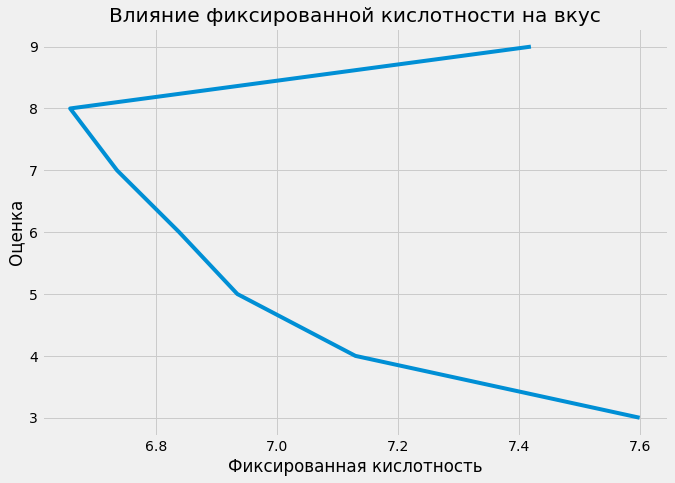

In [45]:
# Создаем линейный график

plt.figure(figsize = (10,7))

plt.plot(data1['fixed_acidity'], data1['quality'])

plt.title('Влияние фиксированной кислотности на вкус')
plt.xlabel('Фиксированная кислотность')
plt.ylabel('Оценка')

plt.show()

В целом можно сделать вывод, что вкус улучшается со снижением фиксированной кислотности

In [46]:
# Готовим данные для графика в виде сводной таблицы
data2 = df.groupby('quality')['residual sugar'].agg(residual_sugar = 'mean').reset_index().sort_values(by = 'quality', ascending = False)  
data2.head(10)

quality  residual_sugar
6        9        4.120000
5        8        5.671429
4        7        5.186477
3        6        6.441606
2        5        7.334969
1        4        4.628221
0        3        6.392500

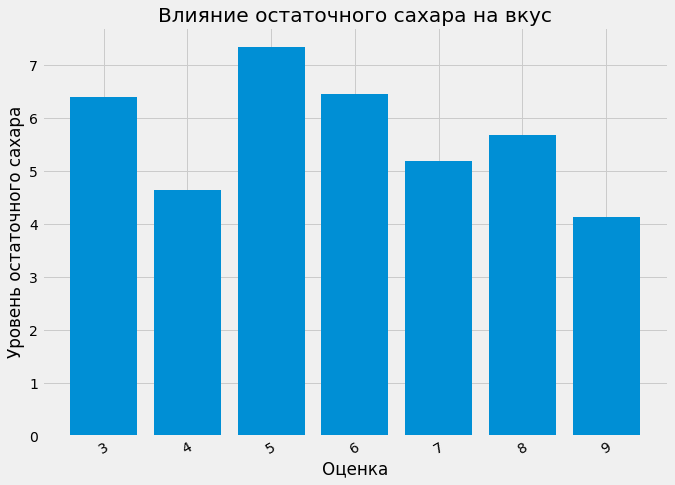

In [47]:
# Строим столбчатую диаграмму

plt.figure(figsize = (10,7))

plt.bar(data2['quality'],data2['residual_sugar'])

plt.title('Влияние остаточного сахара на вкус')
plt.xlabel('Оценка')
plt.ylabel('Уровень остаточного сахара')
plt.xticks(rotation = 30)

plt.show()

Самое вкусное вино при остаточном сахаре > 7

In [48]:
# Готовим данные для графика в виде сводной таблицы
data3 = df.groupby('quality')['alcohol'].agg(alcohol = 'mean').reset_index().sort_values(by = 'quality', ascending = False)  
data.head()

quality  fixed_acidity
6        9       7.420000
5        8       6.657143
4        7       6.734716
3        6       6.837671
2        5       6.933974

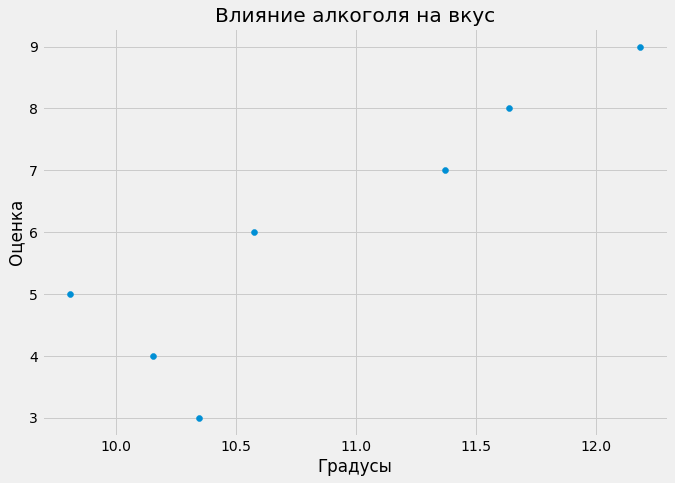

In [49]:
# Строим диаграмму рассеяния

plt.figure(figsize = (10,7))

plt.scatter(data3['alcohol'], data3['quality'])

plt.title('Влияние алкоголя на вкус')
plt.xlabel('Градусы')
plt.ylabel('Оценка')

plt.show()

Чем выше крепость вина, тем лучше его вкус. 

In [50]:
# Готовим данные для графика
data4 = df['good'].value_counts()
data4.head()

yes    3258
no     1640
Name: good, dtype: int64

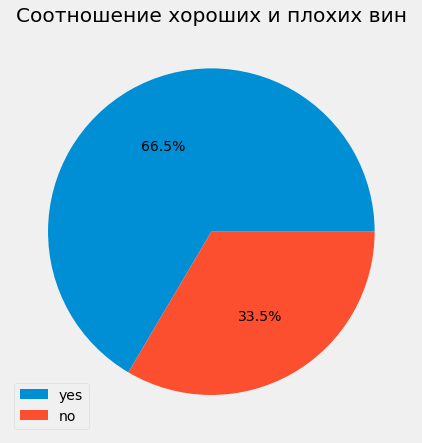

In [54]:
# Строим круговую диаграмму

plt.figure(figsize = (10,7))

plt.pie(data4, autopct='%1.1f%%')

plt.title('Соотношение хороших и плохих вин')
plt.legend(data4.index)

plt.show()

Количество хороших вин больше, чем плохих.

In [52]:
# Строим корреляциогнную матрицу
correlation = df.corr()
correlation

fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.022697  ... -0.120881 -0.113663
volatile acidity          -0.022697          1.000000  ...  0.067718 -0.194723
citric acid                0.289181         -0.149472  ... -0.075729 -0.009209
residual sugar             0.089021          0.064286  ... -0.450631 -0.097577
chlorides                  0.023086          0.070512  ... -0.360189 -0.209934
free sulfur dioxide       -0.049396         -0.097012  ... -0.250104  0.008158
total sulfur dioxide       0.091070          0.089261  ... -0.448892 -0.174737
density                    0.265331          0.027114  ... -0.780138 -0.307123
pH                        -0.425858         -0.031915  ...  0.121432  0.099427
sulphates                 -0.017143         -0.035728  ... -0.017433  0.053678
alcohol                   -0.120881          0.067718  ...  1.000000  0.435575
quality                   -0.113663         -0.194723  ...  0.435575  1.000000

[12 rows x 12 columns]

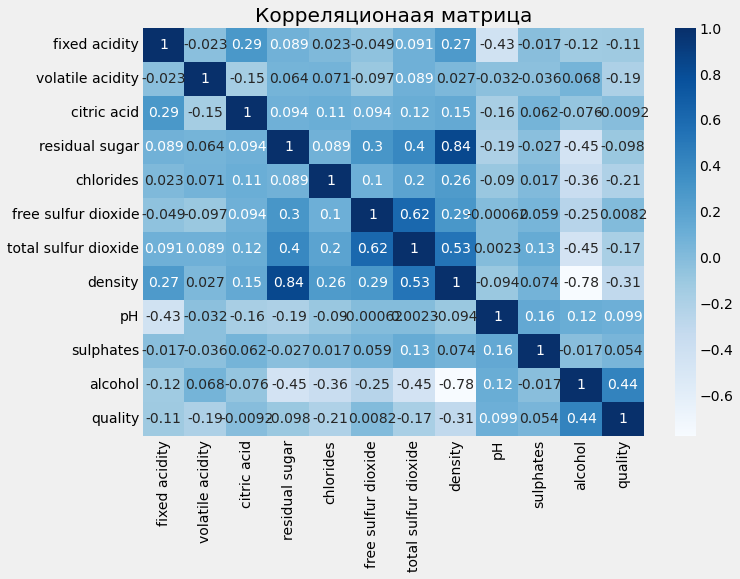

In [53]:
# Строим хитмэп по матрице корреляций
plt.figure(figsize = (10,7))
sns.heatmap(correlation, cmap = 'Blues', annot = True)
plt.title('Корреляционаая матрица')
plt.show()

Как я понимаю, самая сильная зависимость у density и residual sugar